In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
import seaborn as sns

In [5]:
data=pd.read_csv('/home/dell/python_machine_learning/disease/csv/kidney.csv')
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [6]:

data[['htn','dm','cad','pe','ane']] = data[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})

data[['rbc','pc']] = data[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})

data[['pcc','ba']] = data[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
data[['appet']] = data[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
data['classification'] = data['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})
data.rename(columns={'classification':'class'},inplace=True)

data['pe'] = data['pe'].replace(to_replace='good',value=0) # Not having pedal edema is good
data['appet'] = data['appet'].replace(to_replace='no',value=0)
data['cad'] = data['cad'].replace(to_replace='\tno',value=0)
data['dm'] = data['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})
data.drop('id',axis=1,inplace=True)

In [18]:
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
9,53.0,90.0,1.020,2.0,0.0,1.0,1.0,1.0,0.0,70.0,...,29,12100,3.7,1.0,1.0,0.0,0.0,0.0,1.0,1.0
11,63.0,70.0,1.010,3.0,0.0,1.0,1.0,1.0,0.0,380.0,...,32,4500,3.8,1.0,1.0,0.0,0.0,1.0,0.0,1.0
14,68.0,80.0,1.010,3.0,2.0,0.0,1.0,1.0,1.0,157.0,...,16,11000,2.6,1.0,1.0,1.0,0.0,1.0,0.0,1.0
20,61.0,80.0,1.015,2.0,0.0,1.0,1.0,0.0,0.0,173.0,...,24,9200,3.2,1.0,1.0,1.0,0.0,1.0,1.0,1.0


In [7]:
data = data.dropna(axis = 0)

In [8]:
data2=data.dropna()

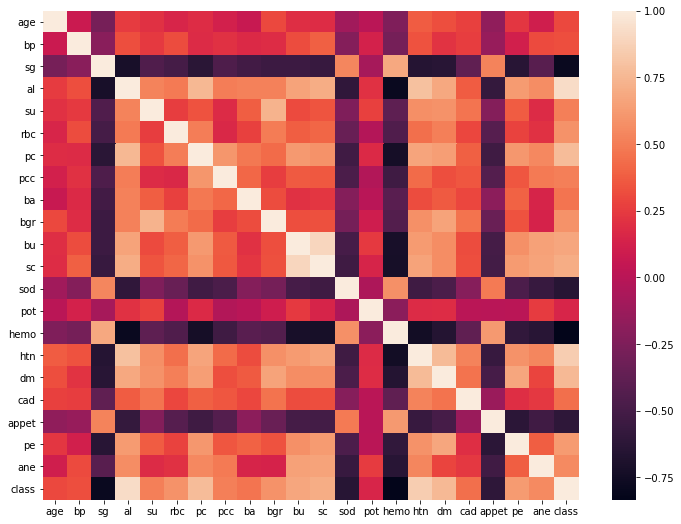

In [26]:
fig = plt.figure(figsize=(12,9))

sns.heatmap(data2.corr())

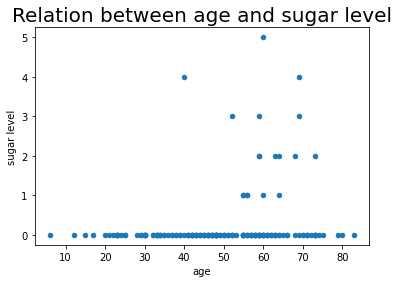

In [24]:
data2.plot(kind='scatter', x='age',y='su')
plt.xlabel("age")
plt.ylabel("sugar level")
plt.title("Relation between age and sugar level", fontsize = 20)
plt.show()

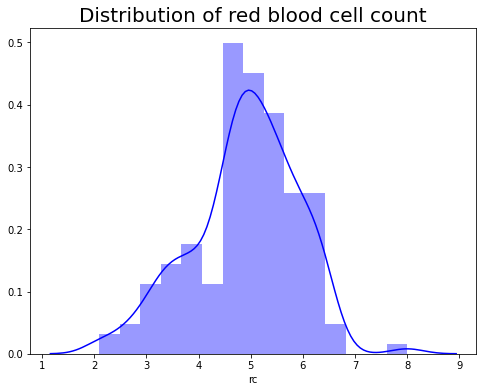

In [11]:
fig = plt.figure(figsize=(8,6))

sns.distplot(data['rc'], color = 'blue')
plt.title('Distribution of red blood cell count', fontsize = 20)

plt.show()

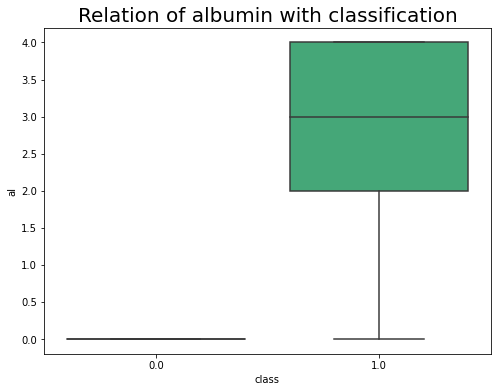

In [12]:
fig = plt.figure(figsize=(8,6))
sns.boxplot(data['class'], data['al'], palette = 'viridis')
plt.title('Relation of albumin with classification', fontsize = 20)
plt.show()

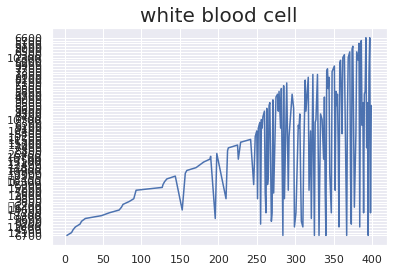

In [32]:
plt.plot(data2["wc"])
plt.title("white blood cell",fontsize = 20)
plt.show()

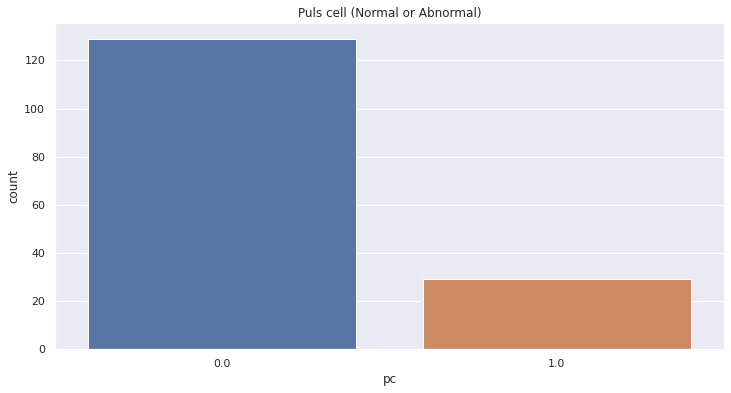

In [33]:

sns.set(style="darkgrid")
plt.figure(figsize=(12,6))
plt.title('Puls cell (Normal or Abnormal)')
sns.countplot(x="pc", data=data)

The meadian is:  50.5


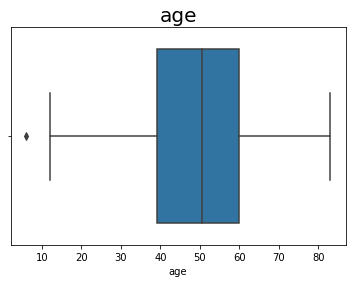

In [15]:
x = data['age']

ax = sns.boxplot(x)

plt.title("age", fontsize = 20)
#printing median
print('The meadian is: ', data['age'].median())


Text(0.5, 1.0, 'Kidney disease')

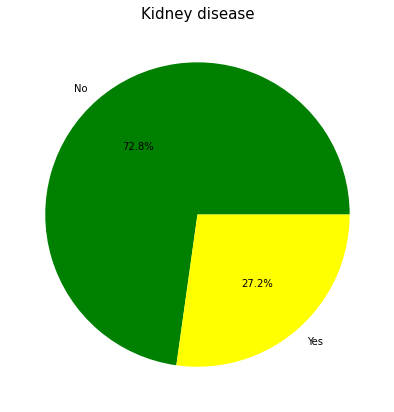

In [20]:
labels = data['class'].value_counts().index
colors = ['green','yellow']
explode = [0,0]
sizes = data['class'].value_counts().values

plt.figure(0,figsize = (7,7))
plt.pie(sizes, explode=explode, labels=("No", "Yes"), colors=colors, autopct='%1.1f%%')
plt.title('Kidney disease',fontsize = 15)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


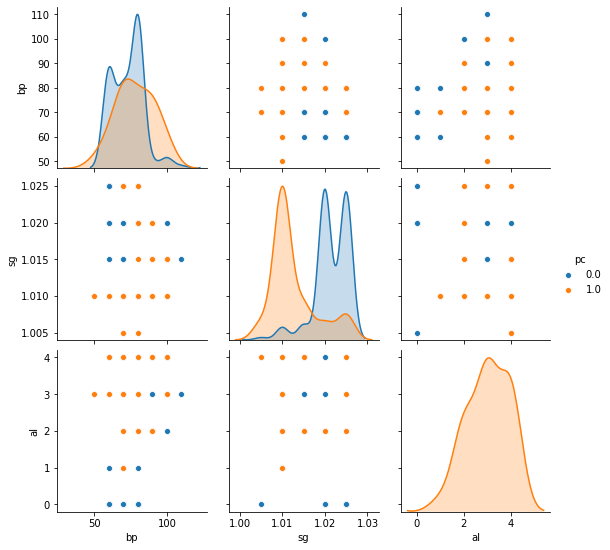

In [21]:
g = sns.pairplot(data[['bp','sg','pc', 'al']], hue = 'pc')

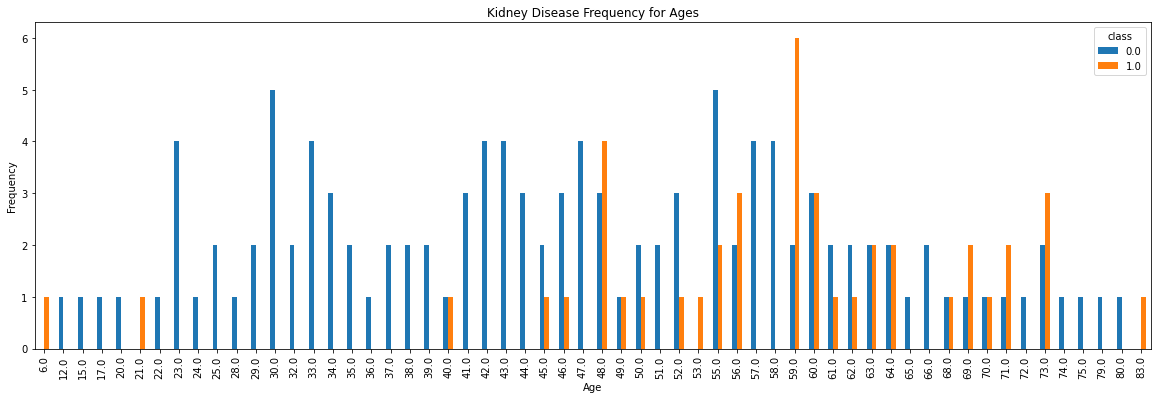

In [28]:
pd.crosstab(data.age,data['class']).plot(kind="bar",figsize=(20,6))
plt.title('Kidney Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

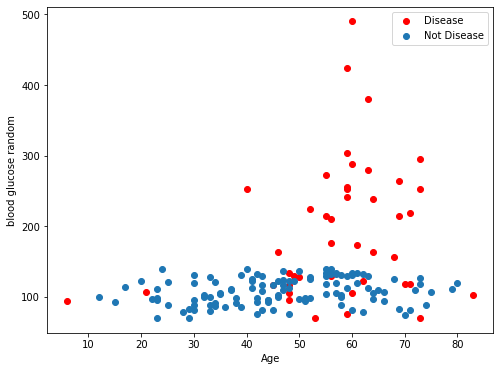

In [30]:
plt.figure(figsize=(8,6))
plt.scatter(x=data.age[data['class']==1], y=data.bgr[(data['class']==1)], c="red")
plt.scatter(x=data.age[data['class']==0], y=data.bgr[(data['class']==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("blood glucose random")
plt.show()